<a href="https://colab.research.google.com/github/NityaVattam2002/Nitya_INFO5731_Fall2024/blob/main/Vattam_Nitya_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [6]:
# Write your code here
# I am using the dataset from Q4A formed by collecting data from Reddit social media platform. Name is reddit_data and file is csv type

# Importing libraries that I need
from collections import defaultdict, Counter
import pandas as pd
import re

# Uploading my reddit_data file here
from google.colab import files
uploaded = files.upload()

# Loading the dataset
dataset = pd.read_csv(next(iter(uploaded.keys())))

# Displaying the first few rows to confirm that am loading data correctly
print(dataset.head())

# Function to preprocess text
def preprocess_text(text):
    # Removing special characters and making everything lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text.split()

# Calculating trigram frequency
def calculate_trigrams(titles):
    trigram_counts = defaultdict(int)
    for title in titles:
        words = preprocess_text(title)
        for i in range(len(words) - 2):  # N=3 for trigram
            trigram = tuple(words[i:i + 3])
            trigram_counts[trigram] += 1
    return trigram_counts

#  Calculating bigram probability
def calculate_bigrams(titles):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    for title in titles:
        words = preprocess_text(title)
        for i in range(len(words) - 1):  # N=2 for bigram
            bigram = tuple(words[i:i + 2])
            bigram_counts[bigram] += 1
            unigram_counts[words[i]] += 1
        # Counting the last word for unigrams
        if words:
            unigram_counts[words[-1]] += 1

    # Calculatng bigram probabilities
    bigram_probabilities = {bigram: count / unigram_counts[bigram[0]] for bigram, count in bigram_counts.items()}
    return bigram_probabilities

#   Extracting noun phrase and relative probability calculation
def extract_noun_phrases(titles):
    noun_phrases = defaultdict(list)
    for idx, title in enumerate(titles):
        words = preprocess_text(title)
        # Heuristic: I am considering any word longer than 3 chars as a noun
        phrases = [word for word in words if len(word) > 3]
        noun_phrases[idx].extend(phrases)
    return noun_phrases

def calculate_relative_probabilities(titles):
    # Extracting all noun phrases and calculating their maxmum frequencies across the reddit_data dataset
    noun_phrases = extract_noun_phrases(titles)
    phrase_counter = Counter([phrase for phrases in noun_phrases.values() for phrase in phrases])
    max_freq = max(phrase_counter.values()) if phrase_counter else 1  # Avoid division by zero

    # Computing relative probabilities for each title
    relative_probs = pd.DataFrame(index=range(len(titles)), columns=phrase_counter.keys())
    for idx, phrases in noun_phrases.items():
        phrase_count = Counter(phrases)
        for phrase, count in phrase_count.items():
            relative_probs.loc[idx, phrase] = count / max_freq  # Frequency ratio

    return relative_probs.fillna(0)

# Extracting titles from my assignment two dataset for analysis
titles = dataset['Title'].dropna().tolist()

# Calculating trigrams and displaying a sample
trigram_counts = calculate_trigrams(titles)
print("Sample Trigram Counts:", dict(list(trigram_counts.items())[:10]))

# Calculating bigram probabilities and displaying a sample
bigram_probabilities = calculate_bigrams(titles)
print("Sample Bigram Probabilities:", dict(list(bigram_probabilities.items())[:10]))

# Calculating relative probabilities for noun phrases and displaying them
relative_probabilities = calculate_relative_probabilities(titles)
print("Relative Probabilities Table:")
print(relative_probabilities.head())





Saving reddit_data.csv to reddit_data (2).csv
                                               Title            Author  Score  \
0                         "Climate change is a hoax"   PupperPocalypse  37471   
1                        Climate Change - A Timeline           TX_borg   1216   
2  My favorite climate change fact that will blow...          solvanic    781   
3  Realistically, how screwed are we by climate c...  thedingoismybaby      2   
4                Is climate change going well or bad        iwasinpari    202   

            Created_At                                                URL  \
0  2024-07-01 02:39:16             https://www.reddit.com/gallery/1dsicld   
1  2022-12-03 18:03:00                https://i.redd.it/nnxapy263q3a1.jpg   
2  2022-09-29 21:35:46                https://i.redd.it/323dbhex9vq91.jpg   
3  2024-05-23 11:10:51  https://www.reddit.com/r/NoStupidQuestions/com...   
4  2023-10-16 00:39:50  https://www.reddit.com/r/climatechange/comment...   

    

<ipython-input-6-06b560884f32>:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return relative_probs.fillna(0)


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
# Write your code here
#I am still using the reddit_data as at question one.
# Importing the libraries
import pandas as pd
import numpy as np
import re
from collections import defaultdict, Counter
from math import log, sqrt

# Uploading my reddit_data dataset here
from google.colab import files
uploaded = files.upload()

# Loading the dataset
dataset = pd.read_csv(next(iter(uploaded.keys())))

# Displaying the first few rows to confirm data loading is okay
print(dataset.head())

#  Preprocessing text (to remove punctuation, lowercase, split into words)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text.split()

# Calculating TF-IDF for each document
def calculate_tf_idf(docs):
    # Counting term frequencies (TF) and document frequencies (DF)
    tf = []
    df = defaultdict(int)
    for doc in docs:
        term_count = Counter(doc)
        tf.append(term_count)
        for term in term_count:
            df[term] += 1

    # Calculating TF-IDF values
    N = len(docs)
    tf_idf = []
    for term_count in tf:
        doc_tf_idf = {}
        for term, count in term_count.items():
            tf_value = count / len(term_count)  # Term frequency
            idf_value = log(N / (df[term] + 1))  # Inverse document frequency with smoothing
            doc_tf_idf[term] = tf_value * idf_value
        tf_idf.append(doc_tf_idf)
    return tf_idf

# Extracting titles for TF-IDF computation
titles = dataset['Title'].dropna().tolist()
docs = [preprocess_text(title) for title in titles]

# Calculating TF-IDF weights for each document
tf_idf_matrix = calculate_tf_idf(docs)

# Converting the TF-IDF weights into a document-term matrix
unique_terms = set(term for doc in tf_idf_matrix for term in doc)
term_to_index = {term: i for i, term in enumerate(unique_terms)}
dt_matrix = np.zeros((len(docs), len(unique_terms)))

for doc_idx, doc_tf_idf in enumerate(tf_idf_matrix):
    for term, weight in doc_tf_idf.items():
        term_idx = term_to_index[term]
        dt_matrix[doc_idx, term_idx] = weight

#  Defining a query and calculating its TF-IDF vector
query = "An Outstanding movie with a haunting performance and best character development"
query_terms = preprocess_text(query)
query_tf = Counter(query_terms)
query_tf_idf = {}

for term, count in query_tf.items():
    tf_value = count / len(query_tf)  # Term frequency for query
    idf_value = log(len(docs) / (sum(1 for doc in docs if term in doc) + 1))  # IDF with smoothing
    query_tf_idf[term] = tf_value * idf_value

# Converting query TF-IDF to vector format
query_vector = np.zeros(len(unique_terms))
for term, weight in query_tf_idf.items():
    if term in term_to_index:
        query_vector[term_to_index[term]] = weight

#  Calculating cosine similarity between query and each document
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = sqrt(np.sum(vec1 ** 2))
    norm_vec2 = sqrt(np.sum(vec2 ** 2))
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0
    return dot_product / (norm_vec1 * norm_vec2)

# Calculating cosine similarity for each document with respect to the query
similarities = [cosine_similarity(query_vector, dt_matrix[i]) for i in range(len(docs))]

# Ranking documents based on similarity
ranked_docs = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)

# Displaying top-ranked documents
top_n = 5  # Adjusting to show more top-ranked documents
print("Top Ranked Documents based on Query Similarity:")
for idx, score in ranked_docs[:top_n]:
    print(f"Document {idx+1} (Similarity: {score:.4f}): {titles[idx]}")








Saving reddit_data.csv to reddit_data.csv
                                               Title            Author  Score  \
0                         "Climate change is a hoax"   PupperPocalypse  37471   
1                        Climate Change - A Timeline           TX_borg   1216   
2  My favorite climate change fact that will blow...          solvanic    781   
3  Realistically, how screwed are we by climate c...  thedingoismybaby      2   
4                Is climate change going well or bad        iwasinpari    202   

            Created_At                                                URL  \
0  2024-07-01 02:39:16             https://www.reddit.com/gallery/1dsicld   
1  2022-12-03 18:03:00                https://i.redd.it/nnxapy263q3a1.jpg   
2  2022-09-29 21:35:46                https://i.redd.it/323dbhex9vq91.jpg   
3  2024-05-23 11:10:51  https://www.reddit.com/r/NoStupidQuestions/com...   
4  2023-10-16 00:39:50  https://www.reddit.com/r/climatechange/comment...   

        

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Saving reddit_data.csv to reddit_data (1).csv
                                               Title            Author  Score  \
0                         "Climate change is a hoax"   PupperPocalypse  37471   
1                        Climate Change - A Timeline           TX_borg   1216   
2  My favorite climate change fact that will blow...          solvanic    781   
3  Realistically, how screwed are we by climate c...  thedingoismybaby      2   
4                Is climate change going well or bad        iwasinpari    202   

            Created_At                                                URL  \
0  2024-07-01 02:39:16             https://www.reddit.com/gallery/1dsicld   
1  2022-12-03 18:03:00                https://i.redd.it/nnxapy263q3a1.jpg   
2  2022-09-29 21:35:46                https://i.redd.it/323dbhex9vq91.jpg   
3  2024-05-23 11:10:51  https://www.reddit.com/r/NoStupidQuestions/com...   
4  2023-10-16 00:39:50  https://www.reddit.com/r/climatechange/comment...   

    

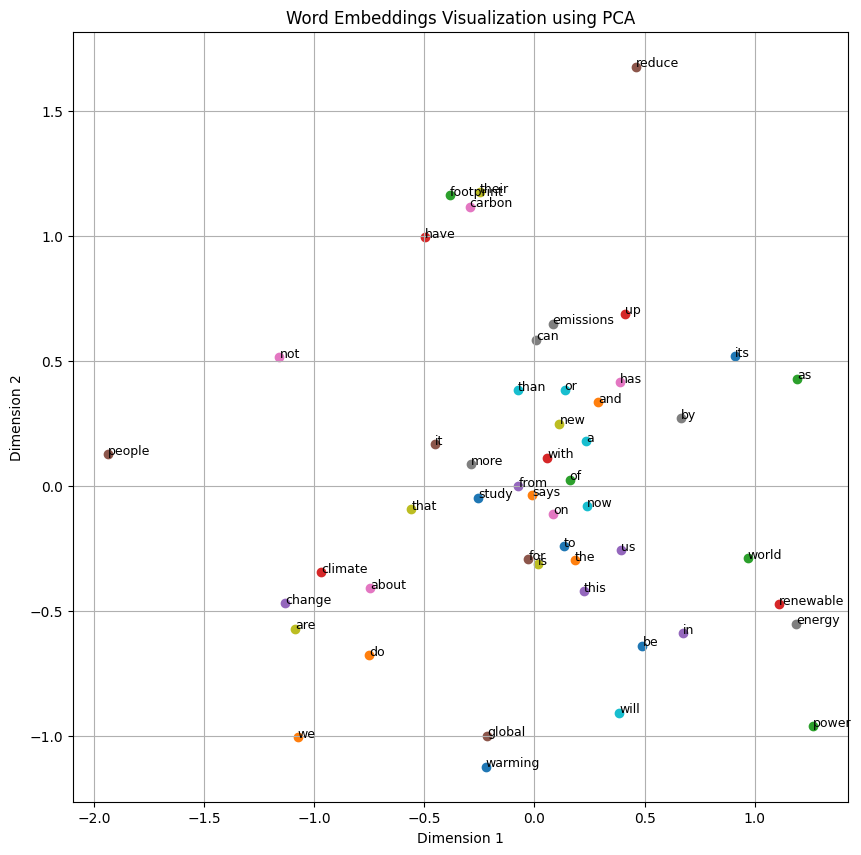

In [4]:
# Write your code here
# I am still relying on the reddit_data dataset
# Importing important libraries
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

#  Loading dataset
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(next(iter(uploaded.keys())))

# Displaying first few rows of the Reddit posts dataset
print(dataset.head())

#  Preprocessing text data
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()  # Removing punctuation and lowercase
    return text.split()  # Tokenizing by splitting on whitespace

# Extracting text data
texts = dataset['Title'].dropna().tolist()
processed_texts = [preprocess_text(text) for text in texts]

#  Training a Word2Vec model
embedding_dim = 300  # Setting embedding dimension to 300
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=embedding_dim, window=5, min_count=2, sg=1, epochs=50)

#  Retrieving the vocabulary from the model
words = list(word2vec_model.wv.key_to_index)
print(f"Vocabulary Size: {len(words)}")

#  Visualizing the word embeddings
# First, am retrieving word vectors and reducing dimensionality for visualization
def visualize_embeddings(model, words_to_visualize=50, method='pca'):
    words_subset = words[:words_to_visualize]  # Selecting the first N words for visualization
    word_vectors = np.array([model.wv[word] for word in words_subset])

    # Reducing dimensionality with PCA or TSNE
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=0)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    reduced_vectors = reducer.fit_transform(word_vectors)

    # Plotting the reduced word embeddings
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words_subset):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)
    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

# Visualizing the embeddings with PCA
visualize_embeddings(word2vec_model, words_to_visualize=50, method='pca')










## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [11]:
# Import needed libraries
import pandas as pd
import re
from google.colab import files

#  Uploading dataset
uploaded = files.upload()
dataset = pd.read_csv(next(iter(uploaded.keys())))

#  Defining a function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing punctuation
    text = text.lower()  # Converting to lowercase
    return text.strip()

#  Preparing an empty list for storing annotated data
annotated_data = []

#  Processing and annotating the first 50 reviews
for i, row in dataset.iterrows():
    if i >= 50:  # Limiting to the first 50 reviews as I know how boring I will feel dealing with more than that!
        break

    document_id = i + 1  # Creating a unique document_id
    raw_text = str(row['Title'])  # Adjusting column name
    clean_review = clean_text(raw_text)

    print(f"\nReview {document_id}: {clean_review}")
    sentiment = input("Enter sentiment (positive, negative, or neutral): ").strip().lower()

    # Appending annotated review as a dictionary to the list
    annotated_data.append({
        'document_id': document_id,
        'clean_text': clean_review,
        'sentiment': sentiment
    })

#  Converting the list of dictionaries to a DataFrame
annotated_df = pd.DataFrame(annotated_data)

#  Saving the annotated dataset to CSV
output_filename = "annotated_reviews.csv"
annotated_df.to_csv(output_filename, index=False)

print(f"\nAnnotated dataset saved as {output_filename}")




Saving reddit_data.csv to reddit_data (6).csv

Review 1: climate change is a hoax
Enter sentiment (positive, negative, or neutral): negative

Review 2: climate change  a timeline
Enter sentiment (positive, negative, or neutral): neutral

Review 3: my favorite climate change fact that will blow liberals minds
Enter sentiment (positive, negative, or neutral): negative

Review 4: realistically how screwed are we by climate change
Enter sentiment (positive, negative, or neutral): negative

Review 5: is climate change going well or bad
Enter sentiment (positive, negative, or neutral): neutral

Review 6: how bad do you think climate change will get
Enter sentiment (positive, negative, or neutral): negative

Review 7: why do people still think that climate change does not exist
Enter sentiment (positive, negative, or neutral): neutral

Review 8: is climate change really real or is earth heating up natural
Enter sentiment (positive, negative, or neutral): negative

Review 9: understanding clim

In [21]:
# The GitHub link of your final csv file

# Link: https://github.com/NityaVattam2002/Nitya_INFO5731_Fall2024/blob/main/annotated_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
This assignment required me to not to use the pre-existing libraries to perform tasks given. This meant that I had
to build code from scratch. This was tasking and a bit difficult as errors kept popping out as I looked for the best way
to respond to the questions.I must agree that this is instilling skills on me by force and I find it okay. On issues
to do with question 4, I found it very hard to append the sentiments myself as I had over 1000 Reddit posts. I
decided to break them at 50 since time could not allow me to respond to all the 1000 posts.


'''

'\nThis assignment required me to not to use the pre-existing libraries to perform tasks given. This meant that I had\nto build code from scratch. This was tasking and a bit difficult as errors kept popping out as I looked for the best way\nto respond to the questions.I must agree that this is instilling skills on me by force and I find it okay. On issues\nto do with question 4, I found it very hard to append the sentiments myself as I had over 1000 Reddit posts. I\ndecided to break them at 50 since time could not allow me to respond to all the 1000 posts.\n\n\n'